# Explore the content of Chinook.db

## Load database

In all generality, databases can be opened using SQLight as in the following cell. 
The principle is the following: 
* the database is connected
* a cursor allowing commands to be executed is set
* several commands can be passed
* the database is closed at the end of the process.

In this case, SQLight is used. The reason behind this choice comes from the fact that this library is preinstalled on MacOS, so no additional library has to be dowloaded in this case.

The Chinook data base is used. It can be dowloaded from [SQLite Tutorials](https://www.sqlitetutorial.net/sqlite-sample-database/) using the following [link](https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip).

This is how it looks like (Entity-Relationship diagram generated by using DbSchema):

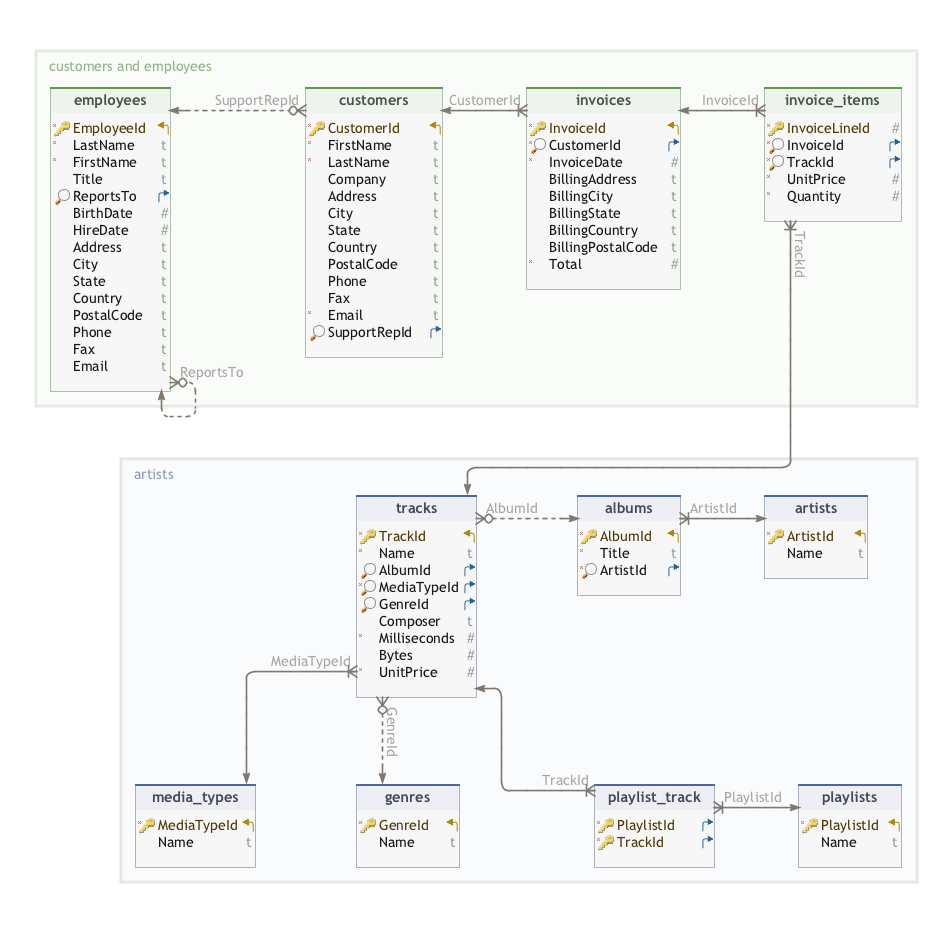



In [1]:
import sqlite3

# Create a connection to a new SQLite database (or connect to an existing one)
conn = sqlite3.connect('../chinook.db')

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

print(cursor)

conn.close()

## Usual commands

The following Python commands in standard SQL are meant to translate a couple of meta-commands that are available with SQLight. Here is an overview of these commands. But first, as before, let's connect the database

In [2]:

conn = sqlite3.connect('../chinook.db')
cursor = conn.cursor()


----
Look at the databases (reproduce the command `.databases`)

In [3]:

cursor.execute("PRAGMA database_list;")

for db in cursor.fetchall():
    print(f"{db}")

(0, 'main', '/Users/geraldinerauber/Desktop/github/sql_tutorial/basic_commands/../chinook.db')


---

Look at the tables (command `.tables`)

In [4]:

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

for table in cursor.fetchall():
    print(table[0])
    

albums
sqlite_sequence
artists
customers
employees
genres
invoices
invoice_items
media_types
playlists
playlist_track
tracks
sqlite_stat1


It is also possible to add a key word that should appear in the tables (command `.table '%es'`)

In [5]:

cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name LIKE '%es';")
for table in cursor.fetchall():
    print(table[0])
    



employees
genres
invoices
media_types


---

Look at the indexes (command `.indexes`)

In [6]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='index';")

for index in cursor.fetchall():
    print(index[0])

sqlite_autoindex_playlist_track_1
IFK_AlbumArtistId
IFK_CustomerSupportRepId
IFK_EmployeeReportsTo
IFK_InvoiceCustomerId
IFK_InvoiceLineInvoiceId
IFK_InvoiceLineTrackId
IFK_PlaylistTrackTrackId
IFK_TrackAlbumId
IFK_TrackGenreId
IFK_TrackMediaTypeId


Again, a key word can be used (`.indexes albums`)

In [7]:
table_name = 'albums'
cursor.execute(f"SELECT name FROM sqlite_master WHERE type='index' AND tbl_name='{table_name}';")

for index in cursor.fetchall():
    print(index[0])


IFK_AlbumArtistId


As well as in a more general case (`.indexes '%es'`)

In [8]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='index' AND name LIKE '%es';")

for index in cursor.fetchall():
    print(index[0])


---

Look at the schema (`.schema`)

In [9]:
cursor.execute("SELECT sql FROM sqlite_master;")

for schema in cursor.fetchall():
    print(schema[0])


CREATE TABLE "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
CREATE TABLE sqlite_sequence(name,seq)
CREATE TABLE "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
)
CREATE TABLE "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
CREATE TABLE "employees"
(

With a key word (`.schema albums`)

In [10]:
table_name = 'albums'
cursor.execute(f"SELECT sql FROM sqlite_master WHERE tbl_name='{table_name}' AND type='table';")

if cursor.fetchone():
    print(schema[0])


CREATE TABLE sqlite_stat1(tbl,idx,stat)


And here having the full schema (`.fullschema`)

In [11]:
cursor.execute("SELECT sql FROM sqlite_master WHERE sql IS NOT NULL;")

for schema in cursor.fetchall():
    print(schema[0])


CREATE TABLE "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
CREATE TABLE sqlite_sequence(name,seq)
CREATE TABLE "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
)
CREATE TABLE "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
CREATE TABLE "employees"
(

Finally, don't forger to close the database 

In [12]:
conn.close()

## Summary of commands


| Shell meta-command in SQLight | Python equivalent in standard SQL |
|:--------|:--------|
.databases | PRAGMA database_list;
.tables	| SELECT name FROM sqlite_master WHERE type='table';
.table '%es' | SELECT name FROM sqlite_master WHERE type='table' AND name LIKE '%es';
.indexes | SELECT name FROM sqlite_master WHERE type='index';
.indexes albums | SELECT name FROM sqlite_master WHERE type='index' AND tbl_name='albums';
.indexes '%es' | SELECT name FROM sqlite_master WHERE type='index' AND name LIKE '%es';
.schema | SELECT sql FROM sqlite_master;
.schema albums | SELECT sql FROM sqlite_master WHERE tbl_name='albums' AND type='table';
.fullschema| SELECT sql FROM sqlite_master WHERE sql IS NOT NULL;


---

#### Side note

All the shell meta-commands can be executed once the database is open. To do so, one has to type the following commands:
```
$ sqlite3 chinook.db
```

or 
```
$ sqlite3 
$ .open chinook.db
```


Again, as for the code provided in this notebook, the database has to be closed once all commands have been executed, by doing:
```
$ .exit
```

## Save queries in files

In [13]:
## save for example the last query in a separate file

sql_queries="SELECT sql FROM sqlite_master WHERE sql IS NOT NULL;"

with open('queries.sql', 'w') as f:
    f.write(sql_queries)
        
        


In [14]:
import sqlite3

conn = sqlite3.connect('../chinook.db')

cursor = conn.cursor()

with open('queries.sql', 'r') as sql_file:
    sql_script = sql_file.read()
    
cursor.execute(sql_script)
for schema in cursor.fetchall():
    print(schema[0])
        
conn.close()

CREATE TABLE "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
CREATE TABLE sqlite_sequence(name,seq)
CREATE TABLE "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
)
CREATE TABLE "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
CREATE TABLE "employees"
(